In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import torch

In [12]:
with open("pleasure_data.json", "r") as f:
  data = json.load(f)

JSONDecodeError: Expecting value: line 1 column 29 (char 28)

In [88]:
etas = data["etas"][-1]
lrs = data["lrs"][-1]
grads = data["grads"][-1]
times = data["grad_time_fracs"]
total_times = data["total_time"]

# num_layers, B, num_heads, seqlen]
etas_tensors = torch.tensor(etas)
lrs_tensors = torch.tensor(lrs)

# [shape is [num_layers, B, num heads, seqlen, head dim]
grads_tensors = torch.tensor(grads)

l, b, _, n, _ = grads_tensors.shape

# [shape is [num_layers, B, seqlen, num heads, head dim]
grads_tensors = grads_tensors.transpose(2, 3)
grads_tensors = torch.norm(grads_tensors, dim=-1)

times_tensors = torch.tensor(times).T
total_times_tensors = torch.tensor(total_times).T

print(etas_tensors.shape)
print(lrs_tensors.shape)
print(grads_tensors.shape)
print(times_tensors.shape)
print(total_times_tensors.shape)

torch.Size([4, 1, 2, 320])
torch.Size([4, 1, 2, 320])
torch.Size([4, 1, 320, 2])
torch.Size([4, 320])
torch.Size([4, 320])


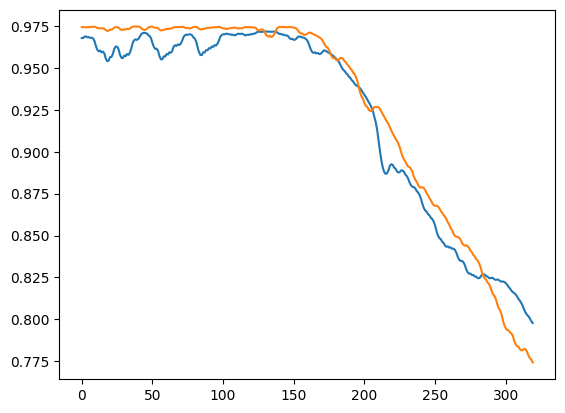

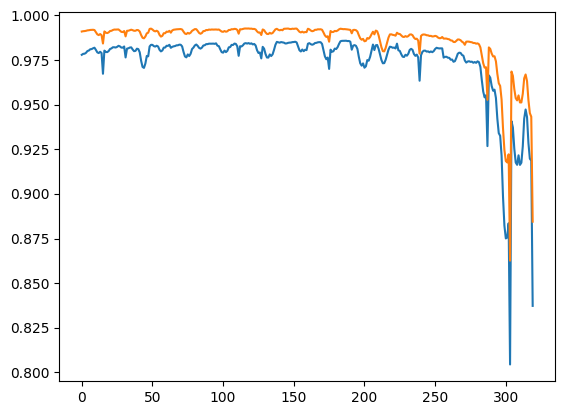

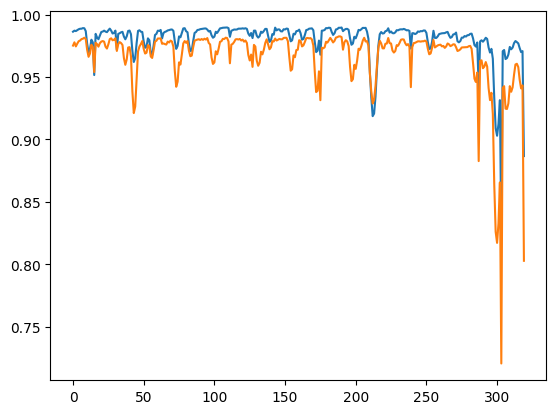

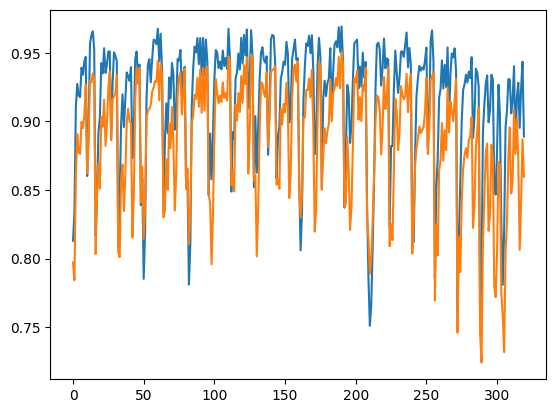

In [91]:
for i in range(4):
  for j in range(2):
    plt.plot(lrs_tensors[i, 0, j])
  plt.show()

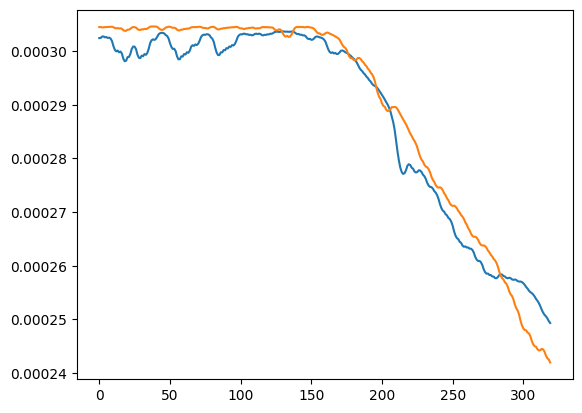

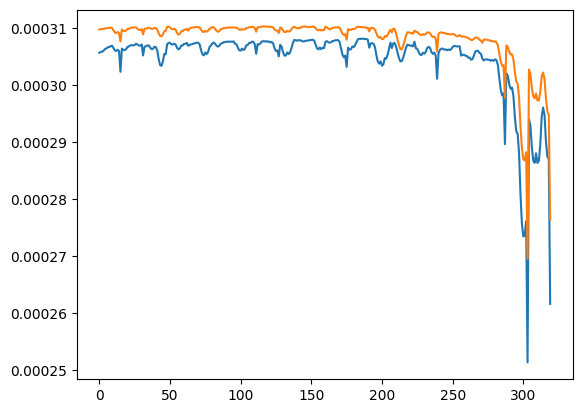

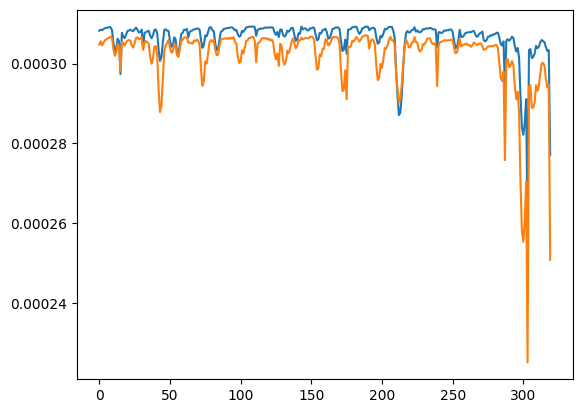

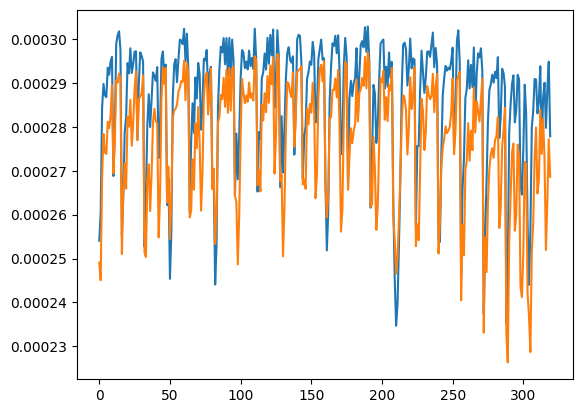

In [92]:
for i in range(4):
  for j in range(2):
    plt.plot(etas_tensors[i, 0, j])
  plt.show()

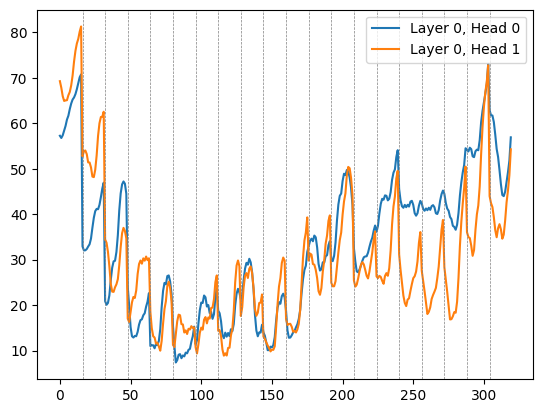

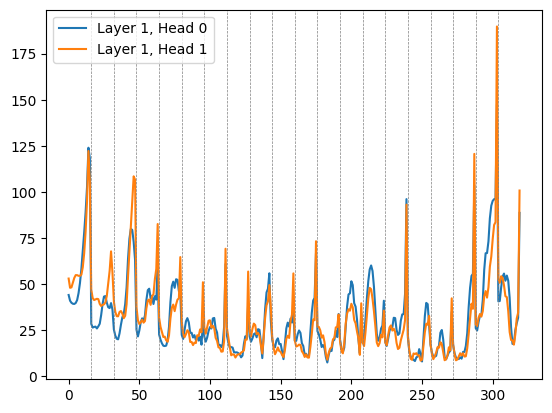

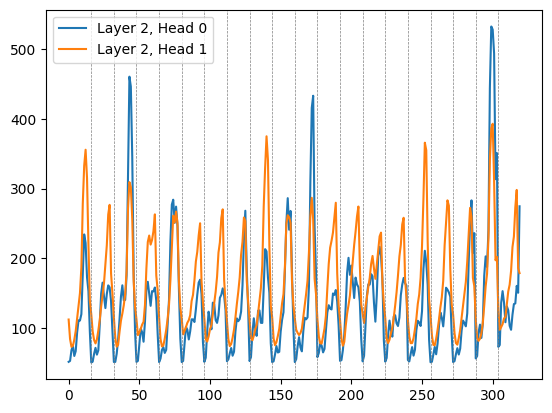

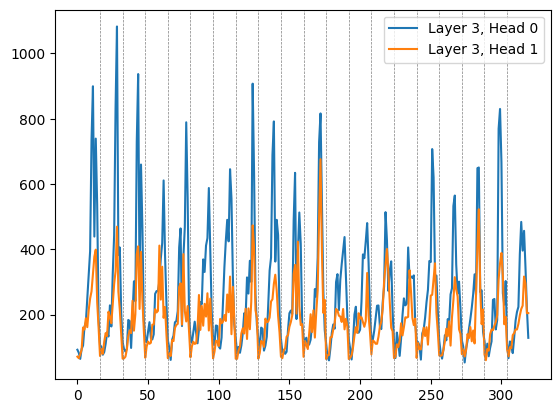

In [93]:
l, b, n, h = grads_tensors.shape

for i in range(4):
  for j in range(2):
    plt.plot(grads_tensors[i, 0, :, j], label=f"Layer {i}, Head {j}")

  for step in range(16, n, 16):
    plt.axvline(x=step, color='gray', linestyle='--', linewidth=0.5)

  plt.legend()
  plt.show()

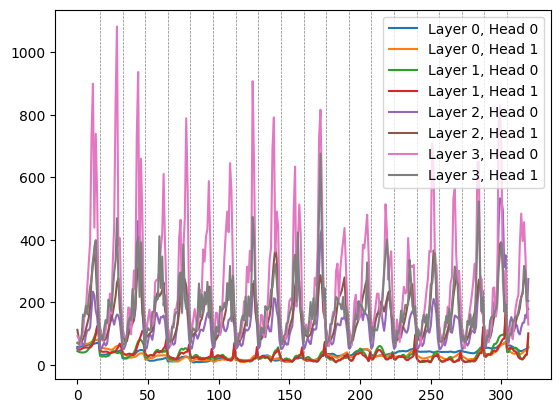

In [94]:
l, b, n, h = grads_tensors.shape

for i in range(4):
  for j in range(2):
    plt.plot(grads_tensors[i, 0, :, j], label=f"Layer {i}, Head {j}")

for step in range(16, n, 16):
  plt.axvline(x=step, color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()

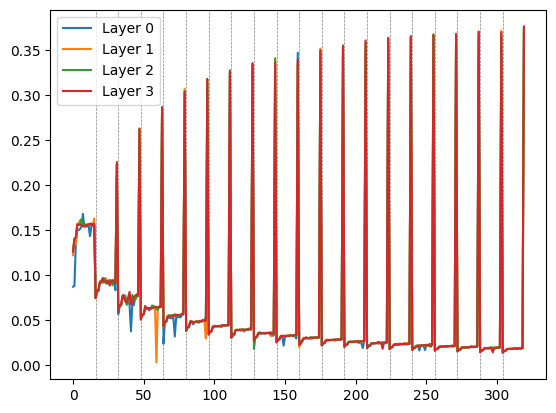

In [90]:
for step in range(16, n, 16):
  plt.axvline(x=step, color='gray', linestyle='--', linewidth=0.5)

for i in range(4):
  plt.plot(times_tensors[i], label=f"Layer {i}")
plt.legend()
plt.show()

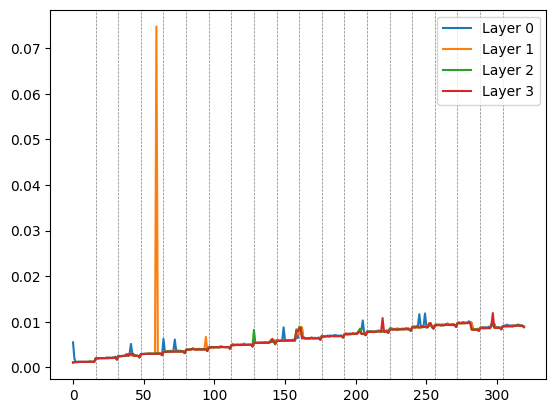

In [89]:
for step in range(16, n, 16):
  plt.axvline(x=step, color='gray', linestyle='--', linewidth=0.5)

for i in range(4):
  plt.plot(total_times_tensors[i], label=f"Layer {i}")
plt.legend()
plt.show()

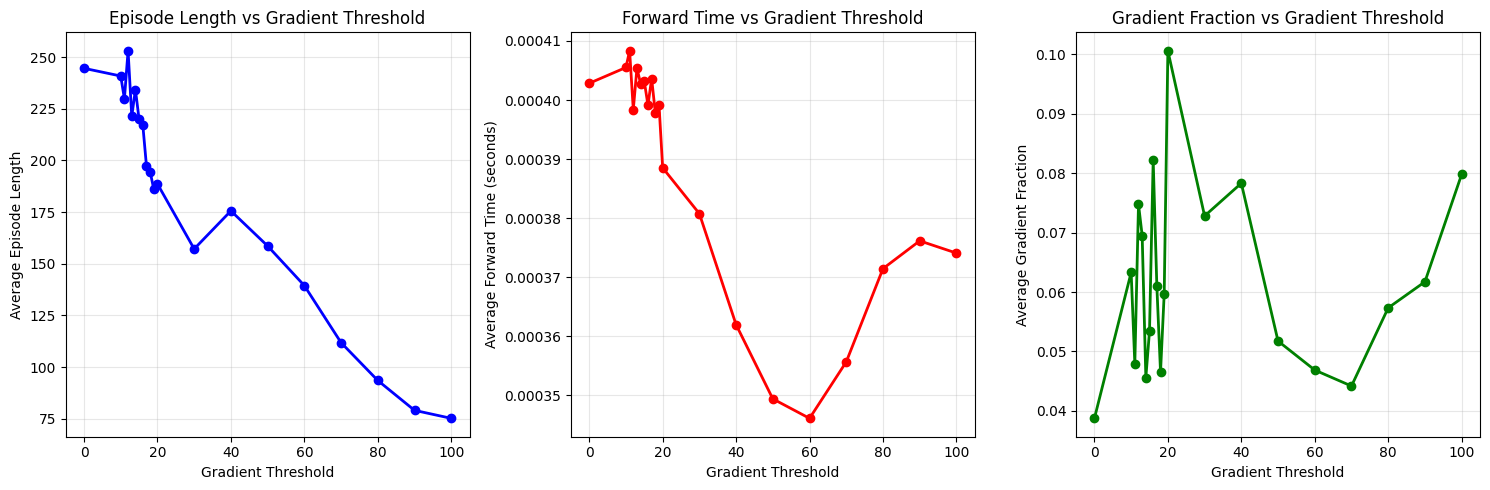

In [9]:
# Parse the data from the output
thresholds = [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]
episode_lengths = [244.625, 240.890625, 229.828125, 253.140625, 221.359375, 234.328125, 219.84375, 217.390625, 197.46875, 194.640625, 186.046875, 188.65625, 157.171875, 175.59375, 158.609375, 139.421875, 111.8125, 93.484375, 79.03125, 75.15625]
forward_times = [0.0004028287687202584, 0.0004055056085939195, 0.0004083418374688536, 0.00039836961775633456, 0.0004054058885376167, 0.0004027383369231306, 0.00040313201246499714, 0.00039912009426938406, 0.000403632017294433, 0.0003978243879997975, 0.0003992349259191893, 0.00038852580973538706, 0.00038075987607604747, 0.0003619718590164998, 0.00034941975905985426, 0.0003461246564362059, 0.00035568619923928454, 0.0003714609040485496, 0.000376162510989554, 0.00037409076976159224]
grad_fracs = [0.03873800887325823, 0.06330292941687132, 0.047919018994000036, 0.07478168556703106, 0.06951881814045499, 0.04558758352617849, 0.05345193502016418, 0.08223361845196263, 0.06093769826094566, 0.046519651945437376, 0.05970752995744665, 0.10063505215807425, 0.07281323707625695, 0.07832184703848274, 0.05175111639762918, 0.04686513692590938, 0.044176673431873786, 0.057337804181918334, 0.06172893609787805, 0.0798104844622966]

# Additional data points
# additional_thresholds = []
# # additional_episode_lengths = []
# additional_forward_times = []
# additional_grad_fracs = []

# Combine with existing data
# all_thresholds = thresholds + additional_thresholds
# all_episode_lengths = episode_lengths + additional_episode_lengths
# all_forward_times = forward_times + additional_forward_times
# all_grad_fracs = grad_fracs + additional_grad_fracs


# Create a figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot episode lengths
ax1.plot(thresholds, episode_lengths, 'b-o', linewidth=2, markersize=6)
ax1.set_xlabel('Gradient Threshold')
ax1.set_ylabel('Average Episode Length')
ax1.set_title('Episode Length vs Gradient Threshold')
ax1.grid(True, alpha=0.3)

# Plot forward times
ax2.plot(thresholds, forward_times, 'r-o', linewidth=2, markersize=6)
ax2.set_xlabel('Gradient Threshold')
ax2.set_ylabel('Average Forward Time (seconds)')
ax2.set_title('Forward Time vs Gradient Threshold')
ax2.grid(True, alpha=0.3)

# Plot gradient fractions
ax3.plot(thresholds, grad_fracs, 'g-o', linewidth=2, markersize=6)
ax3.set_xlabel('Gradient Threshold')
ax3.set_ylabel('Average Gradient Fraction')
ax3.set_title('Gradient Fraction vs Gradient Threshold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



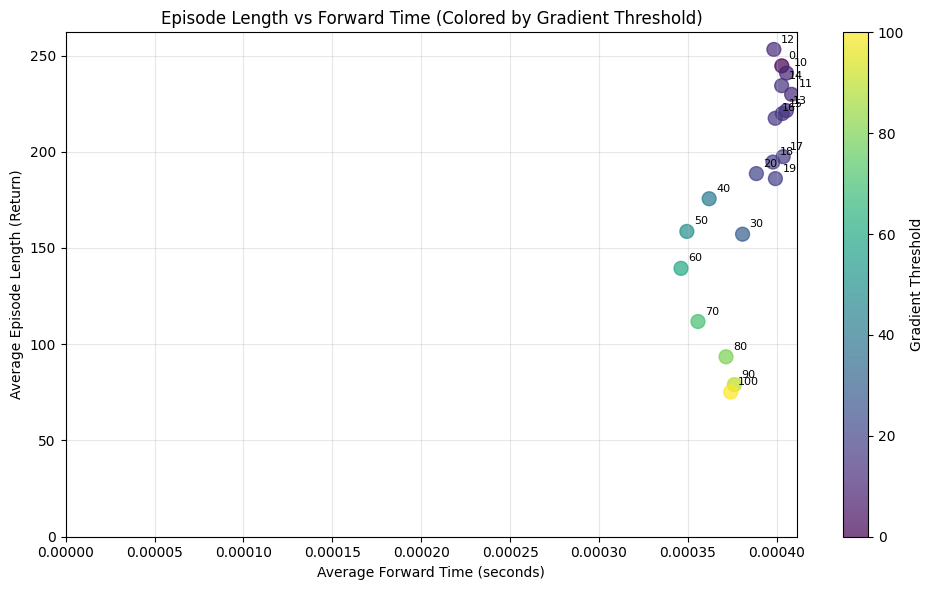

In [19]:
# Create a scatter plot with forward time vs episode length, colored by gradient threshold
plt.figure(figsize=(10, 6))

# Create a scatter plot
scatter = plt.scatter(forward_times, episode_lengths, c=thresholds, cmap='viridis', s=100, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Gradient Threshold')

# Set labels and title
plt.xlabel('Average Forward Time (seconds)')
plt.ylabel('Average Episode Length (Return)')
plt.title('Episode Length vs Forward Time (Colored by Gradient Threshold)')
plt.grid(True, alpha=0.3)

# Add text annotations for each point
for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold}', (forward_times[i], episode_lengths[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
    
# Draw a line from origin to threshold 0 point
origin_x, origin_y = 0, 0
threshold_0_idx = thresholds.index(0)
threshold_0_x = forward_times[threshold_0_idx]
threshold_0_y = episode_lengths[threshold_0_idx]

# plt.plot([origin_x, threshold_0_x], [origin_y, threshold_0_y], 'k--', linewidth=2, alpha=0.7, label='Line to threshold 0')

# # Set axis limits to maintain original scaling
# plt.xlim(0.000325, 0.000425)
# plt.ylim(50, 275)

plt.xlim(left=0)
plt.ylim(bottom=0)

# plt.legend()


plt.tight_layout()
plt.show()


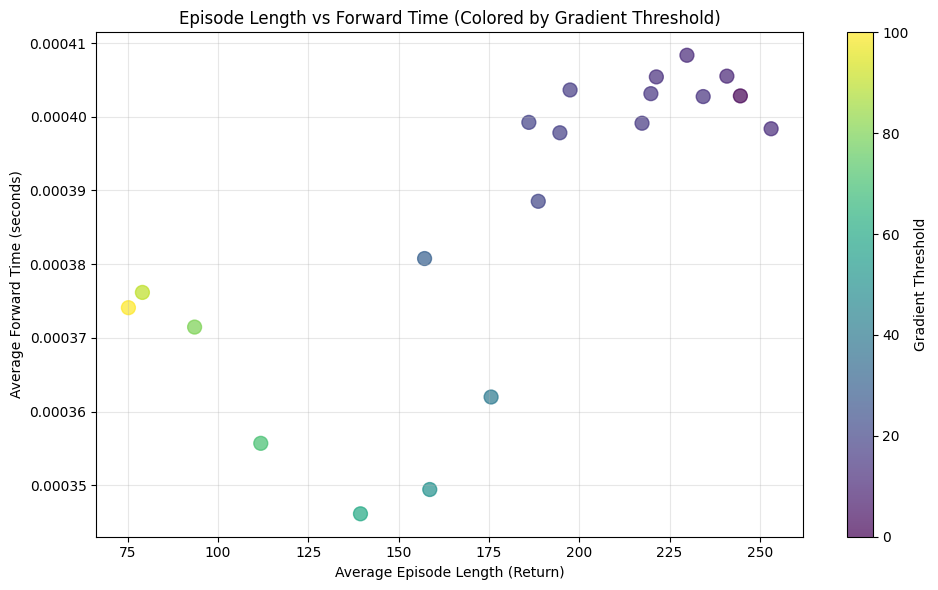

In [22]:
# Create a scatter plot with forward time vs episode length, colored by gradient threshold
plt.figure(figsize=(10, 6))

# Create a scatter plot
scatter = plt.scatter(episode_lengths, forward_times, c=thresholds, cmap='viridis', s=100, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Gradient Threshold')

# Set labels and title
plt.ylabel('Average Forward Time (seconds)')
plt.xlabel('Average Episode Length (Return)')
plt.title('Episode Length vs Forward Time (Colored by Gradient Threshold)')
plt.grid(True, alpha=0.3)

# Add text annotations for each point
for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold}', (forward_times[i], episode_lengths[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
    
# Draw a line from origin to threshold 0 point
origin_x, origin_y = 0, 0
threshold_0_idx = thresholds.index(0)
threshold_0_x = forward_times[threshold_0_idx]
threshold_0_y = episode_lengths[threshold_0_idx]

# plt.plot([origin_x, threshold_0_x], [origin_y, threshold_0_y], 'k--', linewidth=2, alpha=0.7, label='Line to threshold 0')

# # Set axis limits to maintain original scaling
# plt.xlim(0.000325, 0.000425)
# plt.ylim(50, 275)

# plt.xlim(left=0)
# plt.ylim(bottom=0)

# plt.legend()


plt.tight_layout()
plt.show()
